In [1]:
from model import *
from data import *
from PIL import Image
import cv2

In [2]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
trainGene = trainGenerator(4,
                           '/data/spacenet/bldg/AllTrain-Old',
                           'PAN-PNG',
                           'GT-PNG',
                           data_gen_args,
                           save_to_dir = None)
validGene = trainGenerator(4,
                           '/data/spacenet/bldg/AllTest-Old',
                           'PAN-PNG',
                           'GT-PNG',
                           data_gen_args,
                           save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('/lfs/jonas/oldunet/weights.hdf5', 
                                   monitor='loss',
                                   verbose=1, 
                                   save_best_only=True)

In [119]:
model.load_weights('/lfs/jonas/oldunet/unet_AllTrain_Buildings.hdf5')

In [4]:

#model.fit(trainGene,
#          steps_per_epoch=2000,
#          epochs=10,
#          callbacks=[model_checkpoint], 
#          validation_data=validGene, 
#          validation_steps=2,
#          verbose=2)

In [96]:
from glob import glob
import random
from skimage.io import imread
from matplotlib import pyplot as plt
import skimage.transform as trans
test_path = '/data/spacenet/bldg/AllTest/PAN-PNG/'
test_images = glob(test_path + '*.png')
image_size = (256, 256, 1)
sample_size = 4

In [114]:
test_sample = random.sample(test_images, sample_size)
samp_imgs = []
for sample in test_sample:
    samp_img = imread(sample)
    #ranCor = np.int16(random.uniform(0, samp_img.shape[0]-image_size[0]))
    #samp_img = samp_img[ranCor:ranCor+image_size[0], ranCor:ranCor+image_size[1]].reshape(image_size)
    samp_img = trans.resize(samp_img, image_size)
    samp_imgs += [samp_img]
samp_imgs = np.array(samp_imgs)

In [120]:
pred = model.predict(samp_imgs)

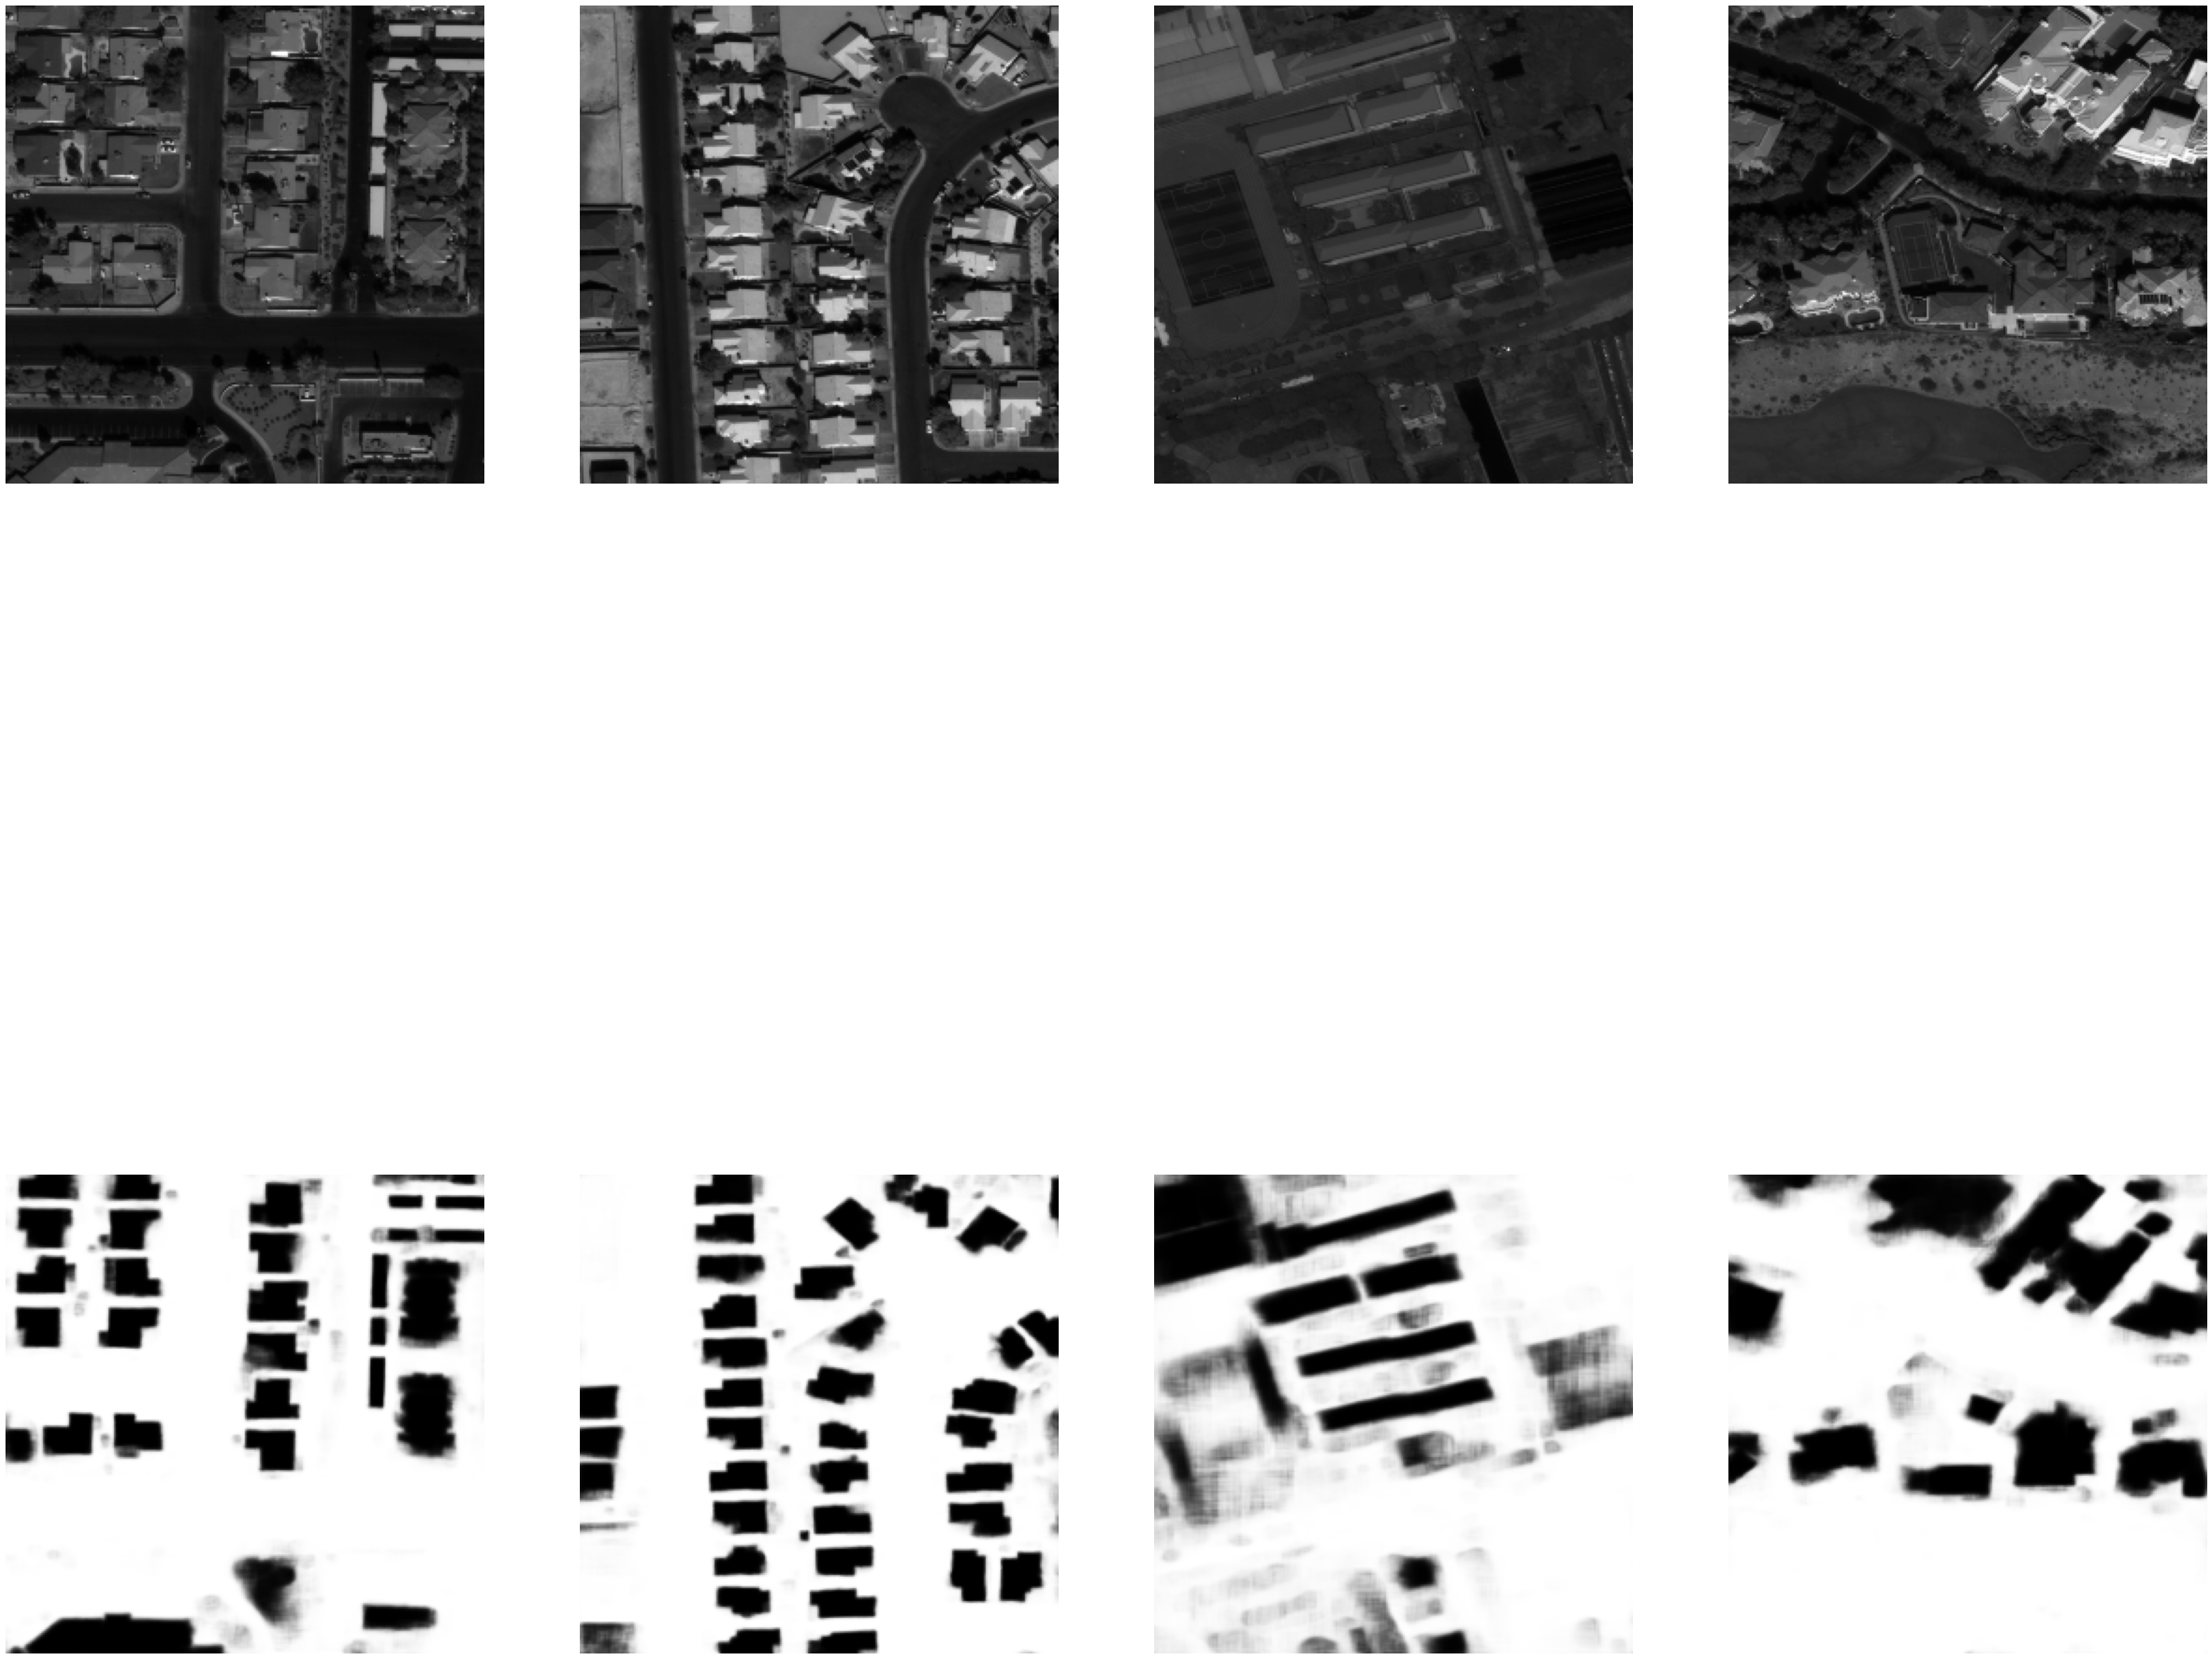

In [121]:
fig, axs = plt.subplots(2, sample_size, figsize=(50, 50))
for idx, ax in enumerate(axs[0]):
    ax.imshow(samp_imgs[idx, :, :, 0], cmap='gray')
    ax.axis('off')
for idx, ax in enumerate(axs[1]):
    ax.imshow(pred[idx, :, :, 0], cmap = 'gray')
    ax.axis('off')